In [35]:
from protosc.simulation import create_simulation_data
from protosc.genetic_algorithm import genetic_algorithm
from protosc.filter_model import train_kfold_validate
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
360*np.arctan(0.27)/(2*np.pi)

15.109575122340466

In [3]:
0.27*4.5

1.215

In [4]:
X, y, truth = create_simulation_data(n_features=50, n_true_features=10)

In [25]:
print(truth)

{'selected_features': array([31, 32, 23, 35, 36, 30, 11, 12, 49,  0]), 'biases': array([ 0.25      , -0.27777778,  0.30555556, -0.33333333,  0.36111111,
       -0.38888889,  0.41666667, -0.44444444,  0.47222222, -0.5       ])}


array([2, 3, 4])

In [6]:
acc_max = [train_kfold_validate(X, y, truth["selected_features"]) for _ in range(10)]
acc_all = [train_kfold_validate(X, y, np.arange(X.shape[1])) for _ in range(10)]

In [23]:
not_selected = np.delete(np.arange(50), truth["selected_features"])
selected = truth["selected_features"]

for n_choice in range(2, len(selected)+1):
    acc = []
    for _ in range(100):
        cur_choice = np.random.choice(selected, size=n_choice, replace=False)
        if isinstance(cur_choice, int):
            cur_choice = [cur_choice]
        acc.append(train_kfold_validate(X, y, cur_choice))
    print(n_choice, np.mean(acc), np.max(acc), np.min(acc), np.std(acc))

2 0.6045625380714021 0.6715281832010263 0.5351766513056835 0.03030799214441704
3 0.630554416340217 0.6791742377659097 0.5699777199533874 0.025476489766494005
4 0.646225709797751 0.6859710553709321 0.5983248655050355 0.020752241446604768
5 0.6595916183613264 0.7064132680203676 0.601437134255453 0.023029630141762764
6 0.6718413029948159 0.7143896297818833 0.5949168129069107 0.02105136127610087
7 0.6889732134940594 0.7311241700578281 0.6365984778348153 0.01882299287206951
8 0.7021893474345776 0.7292271275076747 0.6647687604930254 0.014929630227534385
9 0.7095661447070245 0.7335056190222861 0.6779023218805345 0.011361944848861985
10 0.7157676302257859 0.7346619101163704 0.7010910227489942 0.007180346174077153


In [39]:
def compute_dacc(i_feature):
    remainder_features = selected[selected!=i_feature]
    print(f"------------- {i_feature} ------------")
    for n_extra in range(2, len(selected)):
        d_acc = []
        for _ in range(200):
            cur_choice = np.random.choice(remainder_features, size=n_extra, replace=False)
            acc_without = train_kfold_validate(X, y, cur_choice)
            acc_with = train_kfold_validate(X, y, np.append(cur_choice, [i_feature]))
            d_acc.append(acc_with-acc_without)
        print(n_extra, np.mean(d_acc), np.mean(d_acc)/stats.sem(d_acc))
    print(remainder_features)

In [42]:
compute_dacc(0)

------------- 0 ------------
2 0.051701332729372655 26.226844515096232
3 0.04504474789534957 26.35937745201343
4 0.03586617894969566 25.181606240282168
5 0.03824933929204752 25.902577737006958
6 0.030762257192256406 26.346502449804397
7 0.02983810085884477 26.878444596530517
8 0.021209950612251473 20.372718463048393
9 0.007953554796622431 11.835034169668598
[31 32 23 35 36 30 11 12 49]


In [40]:
compute_dacc(1)

------------- 1 ------------
2 -0.0031796177444112033 -3.694336826786472
3 -0.0019034700679614114 -2.349974485859209
4 -0.0028968339850811912 -3.727308610221209
5 -0.0020450114804348983 -2.6327685986393257
6 -0.0008671876259450972 -1.120136156125798
7 -0.0005908814026166692 -0.7811710958431253
8 0.001086513230999705 1.4452948899769726
9 0.0009419080062503338 1.2043065424416421
[31 32 23 35 36 30 11 12 49  0]


In [41]:
compute_dacc(2)

------------- 2 ------------
2 -0.0031165207646752747 -3.348979942774363
3 -0.002431156145717471 -2.5371301690137744
4 -0.0037566621355221057 -4.058886273074444
5 -0.004484812281359318 -5.477358435688109
6 -0.0029070868871439916 -3.4345457519778604
7 -0.0029923167736408255 -3.9013005558200295
8 -0.0030585121465764847 -3.67757762537594
9 -0.0021658697940776014 -2.880470698188608
[31 32 23 35 36 30 11 12 49  0]


In [43]:
compute_dacc(3)

------------- 3 ------------
2 -0.0038281788685150526 -4.962116832550371
3 -0.0021494968961371834 -2.614477447107697
4 -0.003166871021574468 -3.978351791922557
5 -0.0017549904843085406 -2.5225402294321797
6 0.0004355660231520092 0.5403654006093418
7 -0.0028364977577455468 -3.6234938008488187
8 -0.000837187433069178 -1.1679013456870986
9 2.5415539638015127e-05 0.03663206061766206
[31 32 23 35 36 30 11 12 49  0]


In [46]:
compute_dacc(not_selected[25])

------------- 29 ------------
2 0.011217655573135102 9.838772411903422
3 0.012273313624005971 11.738245845169962
4 0.00930297455678842 8.59662996619008
5 0.008060479300960122 7.604207019784192
6 0.0052634612273356396 5.448377591153226
7 0.005338141053321258 6.045558736456615
8 0.0014102804588489088 1.593828554833321
9 0.00424917725469062 5.158359486743474
[31 32 23 35 36 30 11 12 49  0]


In [47]:
compute_dacc(selected[0])

------------- 31 ------------
2 0.006610163452260042 4.706873152365376
3 0.005714426161055424 5.51940524215752
4 0.0025763587820145234 2.6481382280426904
5 0.007142790823770142 7.681892773234692
6 0.0036343290048524144 3.800791722536144
7 0.004119453666024132 3.88635242830577
8 0.004020654959098793 4.831685638120617
9 0.003186269948263213 4.880225093609471
[32 23 35 36 30 11 12 49  0]


In [48]:
compute_dacc(selected[1])

------------- 32 ------------
2 0.0019108033828707865 1.8560788390641492
3 0.0018516780996022753 1.8822148800201235
4 -0.0013216265571131514 -1.1790966028836731
5 0.0013852444457494771 1.508090306335557
6 -0.001561301506504818 -1.80136711410308
7 -0.00324628922577882 -4.099843532846348
8 -0.0034173463023672553 -3.9635069701431465
9 -0.0018773203404058342 -2.524626159473045
[31 23 35 36 30 11 12 49  0]


In [24]:
print(np.mean(acc_max), np.std(acc_max))
print(np.mean(acc_all), np.std(acc_all))

0.7147907569832596 0.00889782298221633
0.6782807285873191 0.007720709340000266


In [8]:
counter = genetic_algorithm(X, y, n_gen=30, mutation_rate=0.1, truth=truth)

2.0857236868143687
10.2 9.95
[ 8  8  8  8  9 10 10 12 14 15]
[ 5  5  6  6  7  7  7  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 11 11 11 11 12 12 12 12 12 13 13 13 14 15 19]
Avg fitness: 0.5607376492125481, Max: 0.6681795047176872. stdev: 0.045131835787545906
Avg # of features: 5.0
3.38912067713438
13.6 8.7
[ 5  8 10 11 12 16 17 17 18 22]
[ 3  4  4  5  5  5  5  6  6  6  6  7  7  7  7  8  8  8  8  8  8  9  9  9
  9 10 10 10 10 10 11 12 12 12 12 12 13 14 16 17]
Avg fitness: 0.5701699459530027, Max: 0.681540371807184. stdev: 0.09423385497897832
Avg # of features: 4.84
1.9618060203081873
18.1 8.75
[ 5  6  9 12 14 16 17 25 33 44]
[ 3  3  4  5  5  5  5  5  5  6  6  6  6  7  7  7  8  8  8  8  8  8  8  8
  9 10 10 10 11 11 11 13 13 13 14 14 14 14 15 19]
Avg fitness: 0.576326846837238, Max: 0.6879888072956609. stdev: 0.13964339818668403
Avg # of features: 5.31
1.438193856023262
21.5 9.625
[ 9 10 10 13 15 18 18 19 43 60]
[ 2  3  4  4  4  5  5  5  5  6  6  6  6  7  7  7  8  9  9  9 10 1

/home/qubix/Documents/shared_work/protosc/protosc/protosc/genetic_algorithm.py:147: RuntimeWarning: invalid value encountered in sqrt
  print(dif_mean/np.sqrt(var_std))


nan
29.1 10.925
[15 15 17 23 24 24 27 39 47 60]
[ 3  5  6  6  7  7  7  7  8  8  8  8  9  9  9 10 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 14 14 14 14 16 17 19 20 21]
Avg fitness: 0.6186220107112341, Max: 0.7209368278130519. stdev: 0.10043661263063862
Avg # of features: 7.28
2.8054745298952333
31.1 12.675
[ 7 11 15 18 27 31 34 49 52 67]
[ 2  4  5  6  7  8  8  9  9  9  9  9 10 10 10 10 11 11 12 12 12 13 13 13
 13 14 14 15 15 16 16 16 16 17 19 19 21 22 24 28]
Avg fitness: 0.6434273512725204, Max: 0.7011050674259645. stdev: 0.039903789909445174
Avg # of features: 8.18
2.2612370213830184
30.0 12.3
[ 3  9 14 23 25 29 37 43 47 70]
[ 3  3  4  4  4  5  6  6  7  7  8  8  9 10 10 10 10 10 11 12 12 13 13 13
 13 13 14 15 15 16 17 18 18 18 19 20 21 21 25 31]
Avg fitness: 0.6429851363200888, Max: 0.7109849741028104. stdev: 0.03864118106139265
Avg # of features: 7.92
1.7999233800282208
30.8 11.45
[ 6  7 16 26 28 30 33 43 47 72]
[ 2  3  4  5  5  5  6  6  7  7  8  8  8  9  9  9  9  9  9 10 10 10 11

feature 60.2 [-0.5]
feature 36.766666666666666 [0.41666667]
feature 33.333333333333336 [-0.44444444]
feature 20.2 [0.30555556]
feature 17.4 [-0.38888889]
feature 18.333333333333332 [0.25]
feature 10.0 [-0.27777778]
feature 19.533333333333335 [-0.33333333]
feature 32.3 [0.36111111]
feature 50.3 [0.47222222]


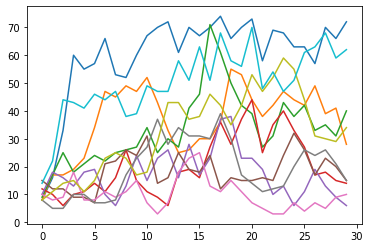

In [10]:
counter = np.array(counter)

for i_feature, counts in enumerate(counter):
    if i_feature in truth["selected_features"]:
        plt.plot(counts)
        print("feature", np.mean(counts), truth["biases"][selected==i_feature])
plt.show()

In [44]:
print(np.mean(counter[not_selected], axis=1))
print(np.mean(counter[selected], axis=1))
print(np.argmax(np.mean(counter[not_selected], axis=1)))

[10.2        12.6        11.7        13.26666667 11.96666667 12.43333333
 11.6        11.96666667  9.73333333 12.76666667 12.5        13.23333333
 13.43333333  7.86666667 10.86666667 11.26666667 11.46666667 11.83333333
  9.8        12.6         8.4         9.         10.43333333  9.46666667
  7.33333333 25.8         8.7         9.76666667 12.1        11.26666667
 14.96666667 13.63333333  7.8        13.6         9.7         9.
  8.9        11.1        12.53333333 12.1       ]
[18.33333333 10.         20.2        19.53333333 32.3        17.4
 36.76666667 33.33333333 50.3        60.2       ]
25


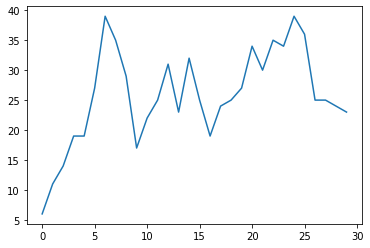

In [14]:

plt.plot(counter[not_selected[25]])